In [17]:
#py_pandas_combine_series.ipynb
import numpy as np              
import pandas as  pd            
import matplotlib.pyplot as plt 
%matplotlib inline
import os
datafile='clean_polling_data.csv'

#useful if you want the directory this script is in
if '__file__' in dir():
    path, _=os.path.split(__file__)  
else: path=os.getcwd() 
    
filename=os.path.join(path, datafile)
df=pd.read_csv(filename, parse_dates=[0]) #dialect defaults to Excel
df.set_index('date', inplace=True)

In [18]:
#py_pandas_combine_series.ipynb
qpoll = df.query('poll=="Quinnipiac"')
rpoll = df.query('poll=="Rasmussen Reports"')

#sort to ensure monotinic, earliest-to-latest dates
qpoll=qpoll.copy(); rpoll.copy()
qpoll.sort_index(inplace=True); rpoll.sort_index(inplace=True)
print(qpoll[:3])
print()
print(rpoll[:3])

                  poll  size stype  approve  disapprove  spread
date                                                           
2017-01-25  Quinnipiac  1190    RV       36          44      -8
2017-02-06  Quinnipiac  1155    RV       42          51      -9
2017-02-21  Quinnipiac  1323    RV       38          55     -17

                         poll  size stype  approve  disapprove  spread
date                                                                  
2017-01-24  Rasmussen Reports  1500    LV       57          43      14
2017-01-31  Rasmussen Reports  1500    LV       53          47       6
2017-02-07  Rasmussen Reports  1500    LV       53          47       6


c:\Users\pbarton\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
#figure out the first and last dates
start=min(qpoll.index.min(), rpoll.index.min())
end=max(qpoll.index.max(), rpoll.index.max())

#throw in a a few days on either end (note negation in the new start offset)
padding=3  
newstart=start+pd.DateOffset(days=-padding)  
newend=end+pd.DateOffset(days=padding)

#... gin up a new date_range for the index
newix=pd.date_range(newstart, newend, freq='d')

#... apply it to both Series
qpoll=qpoll.reindex(pd.to_datetime(newix))
rpoll=rpoll.reindex(pd.to_datetime(newix))

In [20]:
print(qpoll[2:6])
print()
print(rpoll[2:6])

                  poll    size stype  approve  disapprove  spread
2017-01-23         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-24         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-25  Quinnipiac  1190.0    RV     36.0        44.0    -8.0
2017-01-26         NaN     NaN   NaN      NaN         NaN     NaN

                         poll    size stype  approve  disapprove  spread
2017-01-23                NaN     NaN   NaN      NaN         NaN     NaN
2017-01-24  Rasmussen Reports  1500.0    LV     57.0        43.0    14.0
2017-01-25                NaN     NaN   NaN      NaN         NaN     NaN
2017-01-26                NaN     NaN   NaN      NaN         NaN     NaN


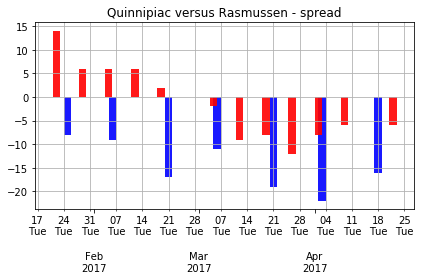

In [21]:
from py_plotting_utils import formatPlotBar

#... specify a column to print
col_to_plot='spread'

#... add some aesthetic elements
q_label ='Quinnipiac'; r_label = 'Rasmussen' 
q_color='b'; r_color='r'
bar_width=2.0; opacity=.9
title = "{} versus {} - {}".format(q_label, r_label, col_to_plot)

formatPlotBar(start=newstart, end=newend, 
              s1=qpoll[col_to_plot], s2=rpoll[col_to_plot],
              s1_label=q_label, s2_label=r_label, 
              s1_color=q_color, s2_color=r_color,
              x_label='', y_label=col_to_plot, title=title,
              bar_width=bar_width, opacity=opacity)

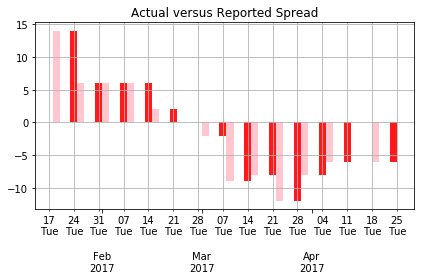

In [45]:
import pandas.tseries.offsets as off

lag_days=5 #to get more granular, we'd need to rescale to hours
rpoll['spread_lag']=rpoll['spread'].shift(- 3)
title="Actual versus Reported Spread"
s2=rpoll['spread_lag']
s2_color='p'
formatPlotBar(start=newstart, end=newend, 
              s1=rpoll['spread'], s2=rpoll['spread_lag'],
              s1_label=r_label, s2_label=r_label, 
              s1_color=r_color, s2_color='pink',
              x_label='', y_label=col_to_plot, title=title,
              bar_width=bar_width, opacity=opacity)

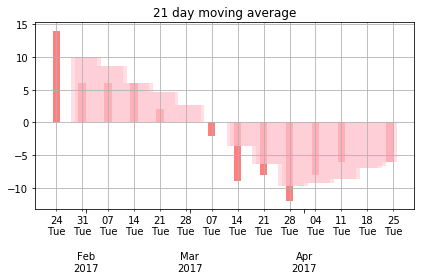

In [56]:
window=21
min_periods=2
title="{} day moving average".format(window)
rpoll['average']=rpoll['spread'].rolling(window, min_periods).mean()
formatPlotBar(start=newstart, end=newend, 
              s1=rpoll['spread'], s2=rpoll['average'],
              s1_label=r_label, s2_label=r_label, 
              s1_color=r_color, s2_color='pink',
              x_label='', y_label=col_to_plot, title=title,
              bar_width=bar_width, opacity=.5)